# for Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction


In [1]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
stemmer=PorterStemmer()

from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re


In [2]:
# 1 point
# load the data from spam.csv
data = 0
# YOUR CODE HERE
data = pd.read_csv('./spam.csv')


In [3]:
assert data.shape == (5572,5)

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# 1 point
# drop the columns unnamed 2,3,4

# YOUR CODE HERE
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [6]:
assert data.shape == (5572,2)

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# 1 POINT
# rename the columns to labels and messages
# YOUR CODE HERE
data.columns = ['labels', 'messages']

In [9]:
assert data['labels'].shape == (5572,)
assert data['messages'].shape == (5572,)

In [10]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

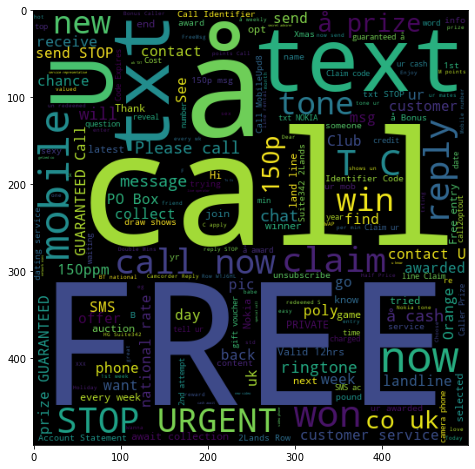

In [11]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

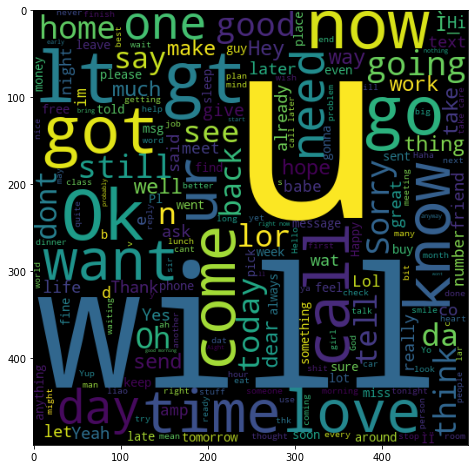

In [12]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [13]:
# 2 points 
# change the labels to 1 or 0 instead of 'spam' and 'ham'
# Encoding our Labels

# YOUR CODE HERE
data['labels'] = data['labels'].replace({'spam': 1, 'ham': 0})

In [14]:
assert data['labels'][0] == 0
assert data['labels'][1] == 0
assert data['labels'][2] == 1

In [15]:
# this part is given to you as a quick glance on the preprocessing in NLP

# preprocessing the Messages

nltk.download('punkt')
nltk.download('stopwords')

new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    
            
    

[nltk_data] Downloading package punkt to /home/alessio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alessio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 5572/5572 [02:26<00:00, 37.99it/s]


In [16]:
new_data

 gt dollar hi hi',
 'good word word may lead u dismay mani time',
 'make sure alex know birthday fifteen minut far concern',
 'sorry got thing may pub later',
 'nah straight bring bud drink some actual little use straight cash',
 'haha good hear office paid market th',
 'mani lick take get center tools pop',
 'yup the r e teacher said make face look longer darren ask cut short',
 'new textbuddi chat horn guy ur area p free receive search postcode gaytextbuddi com txt one name',
 'today vodafone number end select receive award number match call receive award',
 'pleas dont say like hi hi hi',
 'thank u',
 'oh forward message thought send',
 'got seventeen pound seven under ml hope ok',
 'dear voucher holder claim week offer pc go http www e top co uk expressoff ts cs apply stop text txt stop',
 'n funny',
 'sweetheart hope kind day one load reason smile viola',
 'login dat time dad fetch home',
 'shower baby',
 'asked u question hour answer',
 'well mma deficit need stock thanksgiv let 

In [41]:
len(new_data)

5572

In [42]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [43]:
Y.value_counts()


0    4825
1     747
Name: labels, dtype: int64

# splitting the data into training and testing

In [47]:
from sklearn.model_selection import train_test_split

#1 points
# do the train test split, tested with random_state= = 0
# you will need to make sure your data is a numpy array
X_train, X_test, Y_train, Y_test = 0,0,0,0
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(new_data, Y, train_size=0.8, random_state=73)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [48]:

assert X_train.shape == (4457,)
assert X_test.shape == (1115,)
assert Y_train.shape == (4457,)
assert Y_test.shape == (1115,)

# Vectorization using Bag of Words

In [50]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
# 3 points
# use CountVectorizer to vectorize the data

# YOUR CODE HERE
X_train_vect = CountVectorizer()

X_train = X_train_vect.fit_transform(X_train)
X_train[0].shape[0]

AttributeError: lower not found

In [37]:
assert len(X_test[0]) == 29
assert len(X_train[0]) == 36
assert len(X_train[3]) == 21
assert len(X_test[3]) == 58

AssertionError: 

In [33]:
X_train_vect

NameError: name 'X_train_vect' is not defined

In [ ]:
X_test_vect

# Lets train our Model - Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
# 3 points

#train your model

# YOUR CODE HERE
model = GaussianNB()
model.fit(X_train, Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=['import custom service announce premier call freephon'
 'hello saturday go text see decide any tomo tri invite any'
 'tri find chinese food place around' ...
 'receive week trial echo ringen shortly enjoy'
 'frees reply text rand sex female live local luv hear u netcollex ltd p per msg reply stop end'
 'think two still need get cash def read'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
model.classes_
assert model.classes_.shape == (2,)
assert model.classes_[0] == 0
assert model.classes_[1] == 1

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

#7 points

# predict and get the accuracy on test as well as the confusion matrix

acc = 0
conf_matrix = 0
# YOUR CODE HERE
pred = model.predict(X_test)
acc = accuracy_score(Y_test, pred)
conf_matrix = confusion_matrix(Y_test, pred)


NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
assert Y_pred.shape == (1115,)
assert acc >= 80
assert conf_matrix[0][0] >= 3*conf_matrix[0][1]
assert conf_matrix[1][1] >= 3*conf_matrix[1][0]